In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [11]:
# 1. Histogram Function
def plot_histogram(data, column, bins=30, title="Histogram", xlabel="Value", ylabel="Frequency"):
    sns.histplot(data[column], bins=bins, kde=True, color='blue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [12]:
# 2. Line Plot Function
def plot_line(x, y, title="Line Plot", xlabel="X-axis", ylabel="Y-axis"):
    plt.plot(x, y, marker='o', color='red')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

In [13]:
# 3. Confusion Matrix Function
def plot_confusion_matrix(true_labels, predictions, class_names, title="Confusion Matrix"):
    cm = confusion_matrix(true_labels, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

In [14]:
def plot_elbow(data, max_clusters=10, title="Elbow Plot", xlabel="Number of Clusters", ylabel="Inertia"):
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    
    plt.plot(range(1, max_clusters + 1), inertia, marker='o', color='green')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [15]:
def kmeans_clustering(data, n_clusters=3, title="K-Means Clustering"):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)

    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x', s=200, label='Centroids')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

In [16]:
def line_fitting(data):
    # Regression Analysis
    X = data[['CustomerAge']].values
    y = data['AccountBalance']

    reg = LinearRegression()
    reg.fit(X, y)

    # Plot
    plt.scatter(X, y, color='blue', alpha=0.5)
    plt.plot(X, reg.predict(X), color='red', linewidth=2)
    plt.title('Customer Age vs Account Balance')
    plt.xlabel('Customer Age')
    plt.ylabel('Account Balance')
    plt.show()

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 

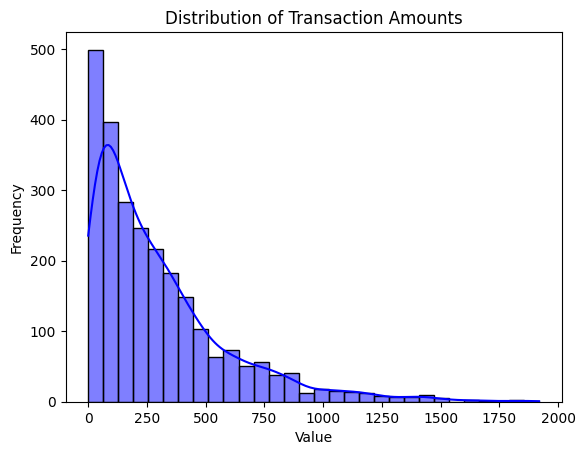

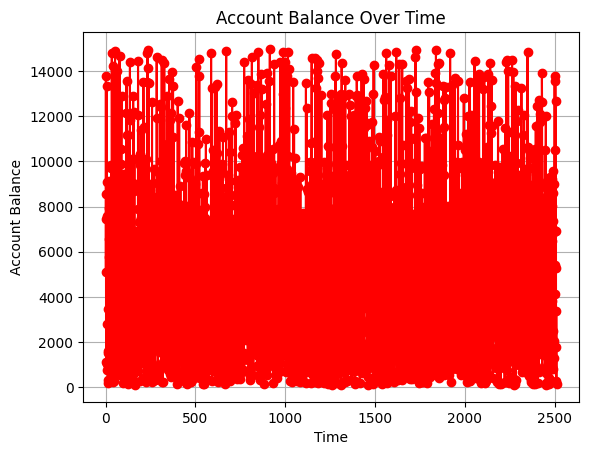

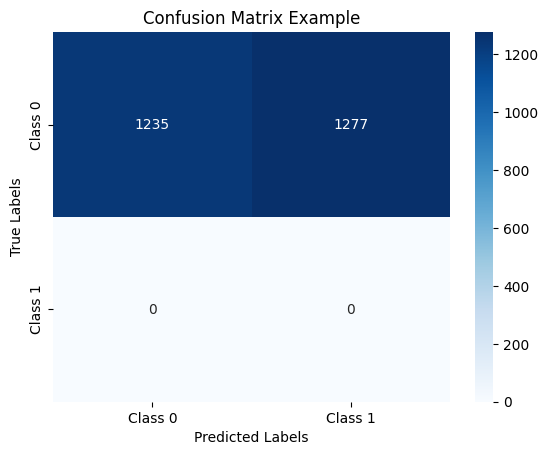

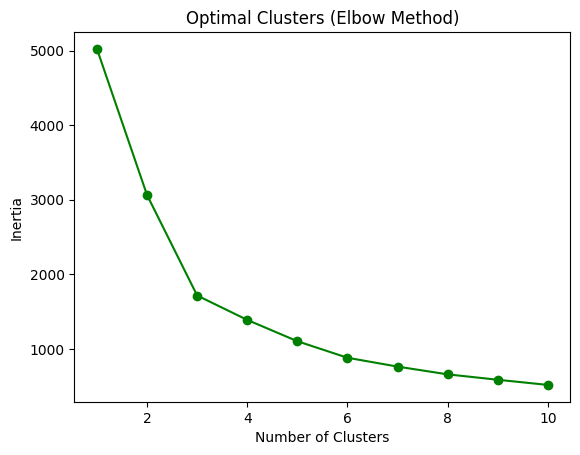

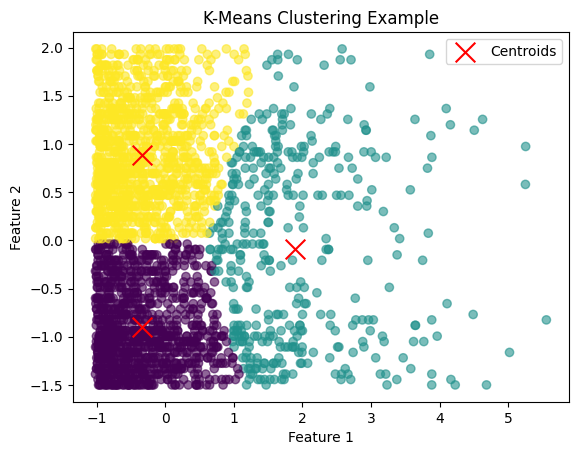

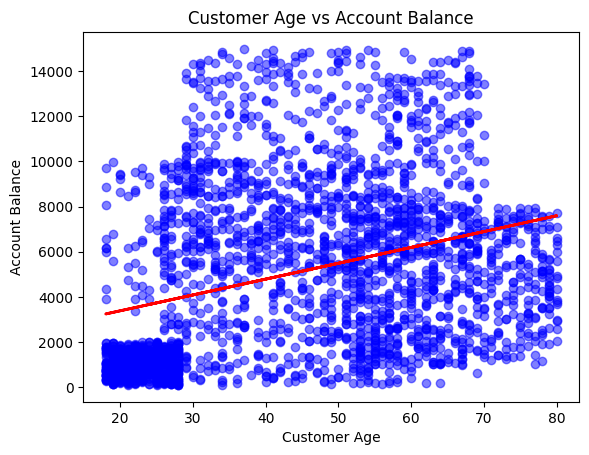

In [17]:
if __name__ == "__main__":
    data = pd.read_csv('./bank_transaction_data.csv')
    print(data.head())
    # print(data.columns)
    
    #preprocessing step
    data = data.dropna(subset=['TransactionAmount', 'AccountBalance', 'TransactionDuration','CustomerAge'])


    data['TransactionAmount'] = pd.to_numeric(data['TransactionAmount'], errors='coerce')
    data['AccountBalance'] = pd.to_numeric(data['AccountBalance'], errors='coerce')
    data['TransactionDuration'] = pd.to_numeric(data['TransactionDuration'], errors='coerce')
    data['CustomerAge'] = pd.to_numeric(data['CustomerAge'], errors='coerce')

    data = data.dropna(subset=['TransactionAmount', 'AccountBalance', 'TransactionDuration', 'CustomerAge'])

    data['TransactionAmount'].fillna(data['TransactionAmount'].mean(), inplace=True)
    data['AccountBalance'].fillna(data['AccountBalance'].mean(), inplace=True)
    data['TransactionDuration'].fillna(data['TransactionDuration'].mean(), inplace=True)
    data['CustomerAge'].fillna(data['CustomerAge'].mean(), inplace=True)

    # Check for any remaining missing values
    print(data.isnull().sum())

    # For clustering (Elbow Plot and K-Means Clustering)
    features = data[['TransactionAmount', 'CustomerAge']]
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Histogram
    plot_histogram(data, 'TransactionAmount', title="Distribution of Transaction Amounts")

    # Line Plot
    plot_line(data.index, data['AccountBalance'], title="Account Balance Over Time", xlabel="Time", ylabel="Account Balance")

    # Confusion Matrix 
    data['TransactionType'] = data['TransactionType'].map({'type1': 0, 'type2': 1})  
    true_labels = data['TransactionType'].fillna(0)
    predictions = np.random.choice([0, 1], len(true_labels))  
    plot_confusion_matrix(true_labels, predictions, class_names=["Class 0", "Class 1"], title="Confusion Matrix Example")

    # Elbow Plot
    plot_elbow(scaled_features, title="Optimal Clusters (Elbow Method)")

    # K-Means Clustering
    kmeans_clustering(scaled_features, n_clusters=3, title="K-Means Clustering Example")

    # Line Fitting
    line_fitting(data)